# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/methods/NonLinCFA")
from NonLinCFA import NonLinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_NonLinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [4]:
### Nota: devo standardizzare tutto prima di chiamare LinCFA ma non serve validare
# infatti il metodo usa i dati per stimare i pesi della regressione lineare
# anche per CMI_FS non serve validare, usa i dati per quantificare l'informazione condivisa col target

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


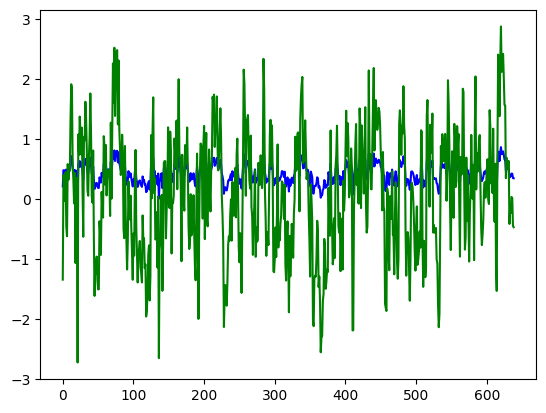

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### wrapper and CMI

In [5]:
### what happens without considering the last years?

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,
      ['cyclostationary_mean_tg','cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 4

Number of features: 130

Number of aggregated features: 4

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 3

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 1



selected columns: ['cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_tg_1w_3', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_16w_1', 'cyclostationary_mean_tg_12w_1', 'cyclostationary_mean_tg_12w_2', 'cyclostationary_mean_tg_8w_0'], 

validation score: 0.25106036974367163, 

number of selected features: 8
Full aggregate regression train score: 0.22000491509275866, test score: 0.23801326849387205
Aggregate regression train score with FS: 0.19054479322909867, test score: 0.30520372962701214
Full aggregate regression train score: 0.2200

Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 5

Number of features: 130

Number of aggregated features: 5

Number of features: 130

Number of aggregated features: 4

Number of features: 130

Number of aggregated features: 4



selected columns: ['cyclostationary_mean_tg_1w_5', 'cyclostationary_mean_tg_4w_1', 'cyclostationary_mean_tg_1w_6', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_tg_4w_3', 'cyclostationary_mean_tg_4w_4', 'cyclostationary_mean_tg_24w_3', 'cyclostationary_mean_tg_4w_7', 'cyclostationary_mean_tg_1w_4', 'cyclostationary_mean_tg_1w_7', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_8w_3', 'cyclostationary_mean_tg_8w_1', 'cyclostationary_mean_tg_12w_0'], 

validation score: 0.41434812529984266, 

number of selected features: 14
Full aggregate regression train score: 0.39258309259895263, test score: -0.19407633111705924
Aggreg

Highest CMI score: -0.0023483248881777385

[12]

Full aggregate regression train score: 0.39258309259895263, test score: -0.19407633111706013
Aggregate regression train score with FS: 0.11969587682061456, test score: 0.1432339499022932
Full aggregate regression train score: 0.39258309259895263, test score: -0.19407633111706013
Aggregate regression train score with FS: 0.11969587682061456, test score: 0.1432339499022932


## precipitation

### wrapper and CMI FS

In [6]:
### what happens without considering the last years?

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,
      ['cyclostationary_mean_rr','cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    

Number of features: 130

Number of aggregated features: 4

Number of features: 130

Number of aggregated features: 9

Number of features: 130

Number of aggregated features: 7

Number of features: 130

Number of aggregated features: 5

Number of features: 130

Number of aggregated features: 3

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 1



selected columns: ['cyclostationary_mean_rr_8w_2', 'cyclostationary_mean_rr_1w_3', 'cyclostationary_mean_rr_12w_1', 'cyclostationary_mean_rr_12w_2', 'cyclostationary_mean_rr_8w_1', 'cyclostationary_mean_rr_4w_3', 'cyclostationary_mean_rr_4w_0', 'cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_rr_1w_1', 'cyclostationary_mean_rr_1w_8'], 

validation score: 0.2477447087270156, 

number of selected features: 10
Full aggregate regression train score: 0.24089293733255268, test score: 0.09608300820301952
Aggregate regression train score with FS: 0.20331644221345047, test score: 0

Number of aggregated features: 14

Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 7

Number of features: 130

Number of aggregated features: 7

Number of features: 130

Number of aggregated features: 3

Number of features: 130

Number of aggregated features: 3



selected columns: ['cyclostationary_mean_rr_8w_3', 'cyclostationary_mean_rr_1w_6', 'cyclostationary_mean_rr_8w_1', 'cyclostationary_mean_rr_1w_1', 'cyclostationary_mean_rr_4w_2', 'cyclostationary_mean_rr_4w_4', 'cyclostationary_mean_rr_16w_2', 'cyclostationary_mean_rr_12w_3', 'cyclostationary_mean_rr_12w_0', 'cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_rr_4w_0', 'cyclostationary_mean_rr_1w_10', 'cyclostationary_mean_rr_1w_12', 'cyclostationary_mean_rr_1w_5', 'cyclostationary_mean_rr_0', 'cyclostationary_mean_rr_1w_13', 'cyclostationary_mean_rr_4w_6', 'cyclostationary_mean_rr_9', 'cyclostationary_mean_rr_12w_2', 'cyclostationary_mean_rr_4w_3', 'cyclos

CMI: 0.007889168932469354
CMI: 0.01485604893928738
CMI: 0.002233842663116159
CMI: 0.008537357238537074
CMI: 0.0018972732229234068
CMI: 0.019951139546004387
CMI: 0.009453773314050062
CMI: 0.0014317799698831402
CMI: 0.0007794278994185666
CMI: 0.004356233384124969
CMI: 0.016961306652393787
CMI: 0.021267368509362672
CMI: 0.0028209353341332455
CMI: 0.024366024719987556
CMI: 0.016862184083064863
CMI: 0.02020620094770431
CMI: 0.002693619027111377
CMI: 0.0005575790750301512
CMI: 0.0025851862966940753
CMI: 0.002099626314046782
CMI: 7.987934391379126e-05
CMI: 0.009078167542819537
CMI: 0.008660946077450132
CMI: 0.007489595545912636
CMI: 0.005607745082198801
CMI: 0.00681933553782979
CMI: 0.010051110514789907
Highest CMI score: 0.024366024719987556
Adding original feature: 22
CMI: 0.0028201080997792283
CMI: 0.0024329645720672366
CMI: 0.006149658459384144
CMI: 0.0013557204081022234
Highest CMI score: 0.006149658459384144
Adding original feature: 30
CMI: 0.000686779037337687
CMI: 0.001719575100345371

----- MI Scores -----
[(24, 0.13685487884232336), (33, 0.13528141162155974), (35, 0.1032695949160546), (27, 0.1029921962278928), (31, 0.10142274764911027), (40, 0.09207223934751455), (32, 0.0916916559491472), (34, 0.09054955462491504), (3, 0.08939889585589772), (30, 0.08179196380125643), (45, 0.08130184534173333), (44, 0.08095590247290019), (0, 0.07919816591699666), (39, 0.0779563925710511), (4, 0.07629816179755175), (42, 0.07593527481570693), (14, 0.07515073162512392), (2, 0.0749465191789086), (23, 0.07453154808910913), (25, 0.07444157853654355), (37, 0.0735140645695574), (26, 0.07272607982751346), (20, 0.0724122460457046), (12, 0.07107575167858916), (13, 0.069480592023157), (9, 0.0681175128446899), (6, 0.06568654390181151), (16, 0.06476007619581492), (7, 0.06405548699189753), (10, 0.06257439496846053), (11, 0.06056925911008613), (43, 0.05791093883117723), (47, 0.054705098402256264), (21, 0.05462822726817888), (46, 0.0512242649630012), (1, 0.05093984246265172), (41, 0.0505753668491712

## temperature and precipitation

### wrapper and CMI FS

In [7]:
### what happens without considering the last years?

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,
      ['cyclostationary_mean_tg','cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr','cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 4

Number of features: 130

Number of aggregated features: 4

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 3

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 1

Number of features: 130

Number of aggregated features: 4

Number of features: 130

Number of aggregated features: 9

Number of features: 130

Number of aggregated features: 7

Number of features: 130

Number of aggregated features: 5

Number of features: 130

Number of aggregated features: 3

Number of features: 130

Number of aggregated features: 2

Number of features: 130

Number of aggregated features: 1



selected columns: ['cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_rr_8w_2', 'cyclostationary_mean_tg_4w_3', 'cyclostationary_mean_rr_12w_1', 'cyclostationary_mean_rr

CMI: 0.018469644675450425
CMI: 0.003173695655592529
CMI: 0.009070013243910047
CMI: 0.013175208376939557
CMI: 0.009242010891818864
CMI: 0.005901752730679832
CMI: 0.004317827344836489
CMI: 0.015443886916817362
CMI: 0.02951111910987672
CMI: 0.01874997708569051
CMI: 0.06516316996146612
CMI: 0.02823472473599603
CMI: 0.018462289385866276
CMI: 0.037969661548884426
CMI: 0.01122604563079585
CMI: 0.027737577667498847
CMI: 0.008689093606747827
CMI: 0.019027692789901768
CMI: 0.025655887599053268
CMI: 0.013287241670572852
CMI: 0.010677041626155098
CMI: 0.005905132456976769
CMI: 0.02357653001496854
CMI: 0.004896054729931237
CMI: 0.02548206891251545
Highest CMI score: 0.06516316996146612
Adding original feature: 65
CMI: 0.00900775757513439
CMI: 0.011121784812033048
CMI: 0.007835685081765548
CMI: 0.0020391175991993082
CMI: 0.009581599546292674
CMI: 0.009259090214488869
CMI: 0.0006220508325395224
Highest CMI score: 0.011121784812033048
Adding original feature: 4
CMI: 0.002594938061139973
CMI: 0.0030029

CMI: 0.006791369961120758
CMI: 0.019177519186935166
CMI: 0.02355014809280398
CMI: 0.03209089799208498
CMI: 0.003744438806941419
CMI: 0.003013481354109754
CMI: 0.0067817026689446225
CMI: 0.011660330218592169
CMI: 0.021434490596266564
CMI: 0.0007677452049260347
CMI: 0.020460821512449018
CMI: 0.01064661599253841
CMI: 0.007354922327033775
CMI: 0.0022220417649313207
CMI: 0.011043474403150622
CMI: 0.018033655943263283
CMI: 0.005943454653525609
CMI: 0.010050784522227574
CMI: 0.0026485441077093996
CMI: 0.0021377223930842126
CMI: 0.012323696173258236
CMI: 0.011911393336681342
CMI: 0.00790017452492578
CMI: 0.02151350626809989
CMI: 0.012846973603104328
CMI: 0.0037649347107827358
CMI: 0.013273146728975754
CMI: 0.004336165703982736
CMI: 0.0033652278555858506
CMI: 0.009577093413615678
CMI: 0.005399859551081909
CMI: 0.001538963882900174
CMI: 0.014238466630755092
CMI: 0.0008026577787554889
CMI: 0.02115007136230368
CMI: 0.02039018210282706
CMI: 0.013571909646116598
CMI: 0.015528413218322629
CMI: 0.0050

CMI: 0.0067817026689446225
CMI: 0.011660330218592169
CMI: 0.021434490596266564
CMI: 0.0007677452049260347
CMI: 0.020460821512449018
CMI: 0.01064661599253841
CMI: 0.007354922327033775
CMI: 0.0022220417649313207
CMI: 0.011043474403150622
CMI: 0.018033655943263283
CMI: 0.005943454653525609
CMI: 0.010050784522227574
CMI: 0.0026485441077093996
CMI: 0.0021377223930842126
CMI: 0.012323696173258236
CMI: 0.011911393336681342
CMI: 0.00790017452492578
CMI: 0.02151350626809989
CMI: 0.012846973603104328
CMI: 0.0037649347107827358
CMI: 0.013273146728975754
CMI: 0.004336165703982736
CMI: 0.0033652278555858506
CMI: 0.009577093413615678
CMI: 0.005399859551081909
CMI: 0.001538963882900174
CMI: 0.014238466630755092
CMI: 0.0008026577787554889
CMI: 0.02115007136230368
CMI: 0.02039018210282706
CMI: 0.013571909646116598
CMI: 0.015528413218322629
CMI: 0.005074376697732835
CMI: 0.006861487182828391
CMI: 0.015696024026967792
CMI: 0.004695386403810897
CMI: 0.021957226727536583
CMI: 0.0015396878800062186
CMI: 0.0

CMI: 0.020460821512449018
CMI: 0.01064661599253841
CMI: 0.007354922327033775
CMI: 0.0022220417649313207
CMI: 0.011043474403150622
CMI: 0.018033655943263283
CMI: 0.005943454653525609
CMI: 0.010050784522227574
CMI: 0.0026485441077093996
CMI: 0.0021377223930842126
CMI: 0.012323696173258236
CMI: 0.011911393336681342
CMI: 0.00790017452492578
CMI: 0.02151350626809989
CMI: 0.012846973603104328
CMI: 0.0037649347107827358
CMI: 0.013273146728975754
CMI: 0.004336165703982736
CMI: 0.0033652278555858506
CMI: 0.009577093413615678
CMI: 0.005399859551081909
CMI: 0.001538963882900174
CMI: 0.014238466630755092
CMI: 0.0008026577787554889
CMI: 0.02115007136230368
CMI: 0.02039018210282706
CMI: 0.013571909646116598
CMI: 0.015528413218322629
CMI: 0.005074376697732835
CMI: 0.006861487182828391
CMI: 0.015696024026967792
CMI: 0.004695386403810897
CMI: 0.021957226727536583
CMI: 0.0015396878800062186
CMI: 0.02511316236557934
Highest CMI score: 0.03209089799208498
Adding original feature: 5
CMI: 0.0028928288145699

CMI: 0.018033655943263283
CMI: 0.005943454653525609
CMI: 0.010050784522227574
CMI: 0.0026485441077093996
CMI: 0.0021377223930842126
CMI: 0.012323696173258236
CMI: 0.011911393336681342
CMI: 0.00790017452492578
CMI: 0.02151350626809989
CMI: 0.012846973603104328
CMI: 0.0037649347107827358
CMI: 0.013273146728975754
CMI: 0.004336165703982736
CMI: 0.0033652278555858506
CMI: 0.009577093413615678
CMI: 0.005399859551081909
CMI: 0.001538963882900174
CMI: 0.014238466630755092
CMI: 0.0008026577787554889
CMI: 0.02115007136230368
CMI: 0.02039018210282706
CMI: 0.013571909646116598
CMI: 0.015528413218322629
CMI: 0.005074376697732835
CMI: 0.006861487182828391
CMI: 0.015696024026967792
CMI: 0.004695386403810897
CMI: 0.021957226727536583
CMI: 0.0015396878800062186
CMI: 0.02511316236557934
Highest CMI score: 0.03209089799208498
Adding original feature: 5
CMI: 0.002892828814569981
CMI: 0.005245730550635208
CMI: 0.010166797752908796
CMI: 0.00359728455438163
CMI: 0.002577988592645686
CMI: 0.00334067864407749